In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  numpy as np
import seaborn as sb

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import OneHotEncoder as Ohe

from tensorflow import keras
from keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report

In [4]:
import csv
import pandas as pd 
df=pd.read_csv('Datasett.csv')
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6672\2829567604.py:3: DtypeWarning: Columns (3,4,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Datasett.csv')


,frame.number,ip.src,ip.dst,tcp.srcport,tcp.dstport,frame.len,ip.proto,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,ip.len,tcp.window_size_value,tcp.analysis.bytes_in_flight,tcp.analysis.push_bytes_sent,frame.time_epoch,traficnature
0,1,10.0.0.134,10.0.0.2,0,0,87,17,0,0,0,73,0,0,0,1.722048e+09,normal
1,2,10.0.0.134,10.0.0.2,0,0,87,17,0,0,0,73,0,0,0,1.722048e+09,normal
2,3,10.0.0.2,10.0.0.134,0,0,151,17,0,0,0,137,0,0,0,1.722048e+09,normal
3,4,10.0.0.2,10.0.0.134,0,0,168,17,0,0,0,154,0,0,0,1.722048e+09,normal
4,5,10.0.0.134,18.154.41.124,41982,443,74,6,True,False,False,60,64240,0,0,1.722048e+09,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250838,1870973,10.0.0.134,185.125.190.17,35050,80,141,6,False,True,False,127,64240,87,87,1.722059e+09,udpflood
3250839,1870974,185.125.190.17,10.0.0.134,80,35050,60,6,False,True,False,40,64240,0,0,1.722059e+09,udpflood
3250840,1870975,185.125.190.17,10.0.0.134,80,35050,243,6,False,True,True,229,64240,189,189,1.722059e+09,udpflood
3250841,1870976,10.0.0.134,185.125.190.17,35050,80,54,6,False,True,True,40,64050,0,0,1.722059e+09,udpflood


In [5]:
number_null_value=df.isnull().sum()
number_null_value

frame.number                    0
ip.src                          0
ip.dst                          0
tcp.srcport                     0
tcp.dstport                     0
frame.len                       0
ip.proto                        0
tcp.flags.syn                   0
tcp.flags.ack                   0
tcp.flags.fin                   0
ip.len                          0
tcp.window_size_value           0
tcp.analysis.bytes_in_flight    0
tcp.analysis.push_bytes_sent    0
frame.time_epoch                0
traficnature                    0
dtype: int64

In [6]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df

,frame.number,ip.src,ip.dst,tcp.srcport,tcp.dstport,frame.len,ip.proto,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,ip.len,tcp.window_size_value,tcp.analysis.bytes_in_flight,tcp.analysis.push_bytes_sent,frame.time_epoch,traficnature
0,1,10.0.0.134,10.0.0.2,0,0,87,17,0,0,0,73,0,0,0,1.722048e+09,normal
1,2,10.0.0.134,10.0.0.2,0,0,87,17,0,0,0,73,0,0,0,1.722048e+09,normal
2,3,10.0.0.2,10.0.0.134,0,0,151,17,0,0,0,137,0,0,0,1.722048e+09,normal
3,4,10.0.0.2,10.0.0.134,0,0,168,17,0,0,0,154,0,0,0,1.722048e+09,normal
4,5,10.0.0.134,18.154.41.124,41982,443,74,6,True,False,False,60,64240,0,0,1.722048e+09,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250838,1870973,10.0.0.134,185.125.190.17,35050,80,141,6,False,True,False,127,64240,87,87,1.722059e+09,udpflood
3250839,1870974,185.125.190.17,10.0.0.134,80,35050,60,6,False,True,False,40,64240,0,0,1.722059e+09,udpflood
3250840,1870975,185.125.190.17,10.0.0.134,80,35050,243,6,False,True,True,229,64240,189,189,1.722059e+09,udpflood
3250841,1870976,10.0.0.134,185.125.190.17,35050,80,54,6,False,True,True,40,64050,0,0,1.722059e+09,udpflood


['normal' 'synflood' 'land' 'icmpflood' 'httpflood' 'tcpflood' 'udpflood']


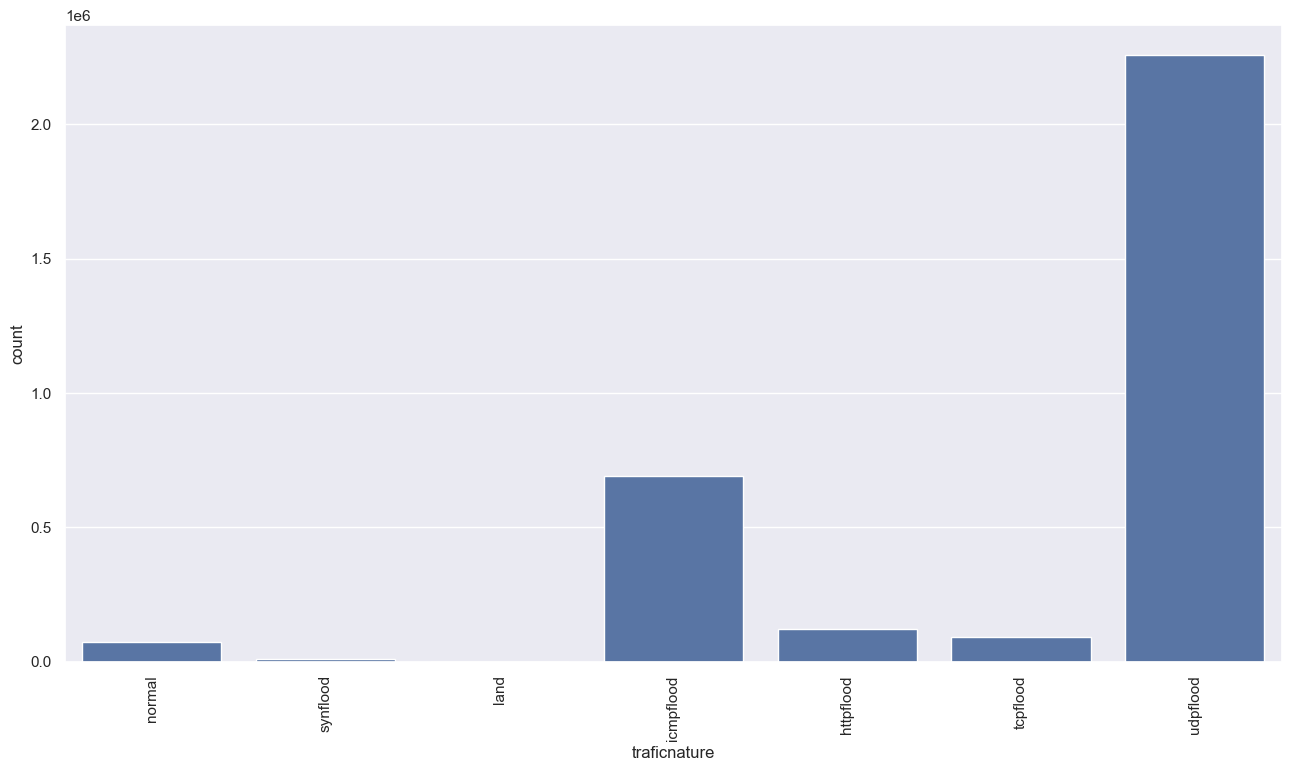

In [7]:
print(df['traficnature'].unique())
sns.set(rc={'figure.figsize':(15.7,8.27)})
#Plot Bar chart to understand event total of device
p=sns.countplot(x='traficnature', data=df)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250843 entries, 0 to 3250842
Data columns (total 16 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   frame.number                  int64  
 1   ip.src                        object 
 2   ip.dst                        object 
 3   tcp.srcport                   object 
 4   tcp.dstport                   object 
 5   frame.len                     int64  
 6   ip.proto                      int64  
 7   tcp.flags.syn                 object 
 8   tcp.flags.ack                 object 
 9   tcp.flags.fin                 object 
 10  ip.len                        int64  
 11  tcp.window_size_value         int64  
 12  tcp.analysis.bytes_in_flight  int64  
 13  tcp.analysis.push_bytes_sent  int64  
 14  frame.time_epoch              float64
 15  traficnature                  object 
dtypes: float64(1), int64(7), object(8)
memory usage: 396.8+ MB


In [9]:
df.describe()

,frame.number,frame.len,ip.proto,ip.len,tcp.window_size_value,tcp.analysis.bytes_in_flight,tcp.analysis.push_bytes_sent,frame.time_epoch
count,3.250843e+06,3.250843e+06,3.250843e+06,3.250843e+06,3.250843e+06,3.250843e+06,3.250843e+06,3.250843e+06
mean,6.396724e+05,1.325252e+02,1.271009e+01,1.145187e+02,1.394874e+03,6.056731e+01,5.374917e+01,1.714127e+09
std,5.502094e+05,1.343285e+03,6.805636e+00,1.343520e+03,7.317205e+03,1.736598e+03,1.591110e+03,1.165853e+08
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.704940e+05,6.000000e+01,6.000000e+00,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.722052e+09
50%,4.694170e+05,7.400000e+01,1.700000e+01,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.722059e+09
75%,1.058266e+06,7.400000e+01,1.700000e+01,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.722059e+09
max,1.870977e+06,6.429300e+04,1.700000e+01,6.427900e+04,6.553500e+04,6.423900e+04,6.423900e+04,1.722060e+09


In [10]:
columnsdrop=["ip.src","ip.dst",'frame.number','frame.time_epoch']
df=df.drop(columns=columnsdrop,axis=1)

In [11]:
import re

# Fonction pour vérifier si une valeur est une adresse IP
def is_ip(value):
    # Expression régulière pour une adresse IP
    pattern = r"\b(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\b"
    return bool(re.match(pattern, str(value)))

# Appliquer la fonction aux colonnes tcp.srcport et tcp.dstport
df = df[~df['tcp.srcport'].apply(is_ip)]
df = df[~df['tcp.dstport'].apply(is_ip)]


In [12]:
# Convertir les valeurs booléennes en entiers
df['tcp.flags.syn'] = (df['tcp.flags.syn'] == 'True').astype(int)
df['tcp.flags.ack'] = (df['tcp.flags.ack'] == 'True').astype(int)
df['tcp.flags.fin'] = (df['tcp.flags.fin'] == 'True').astype(int)

In [14]:
# # Convertir les valeurs en chaînes de caractères
# df['ip.id'] = df['ip.id'].astype(str)

# # Convertir les valeurs hexadécimales en valeurs décimales
# df['ip.id'] = df['ip.id'].apply(lambda x: int(x, 16))


<Axes: >

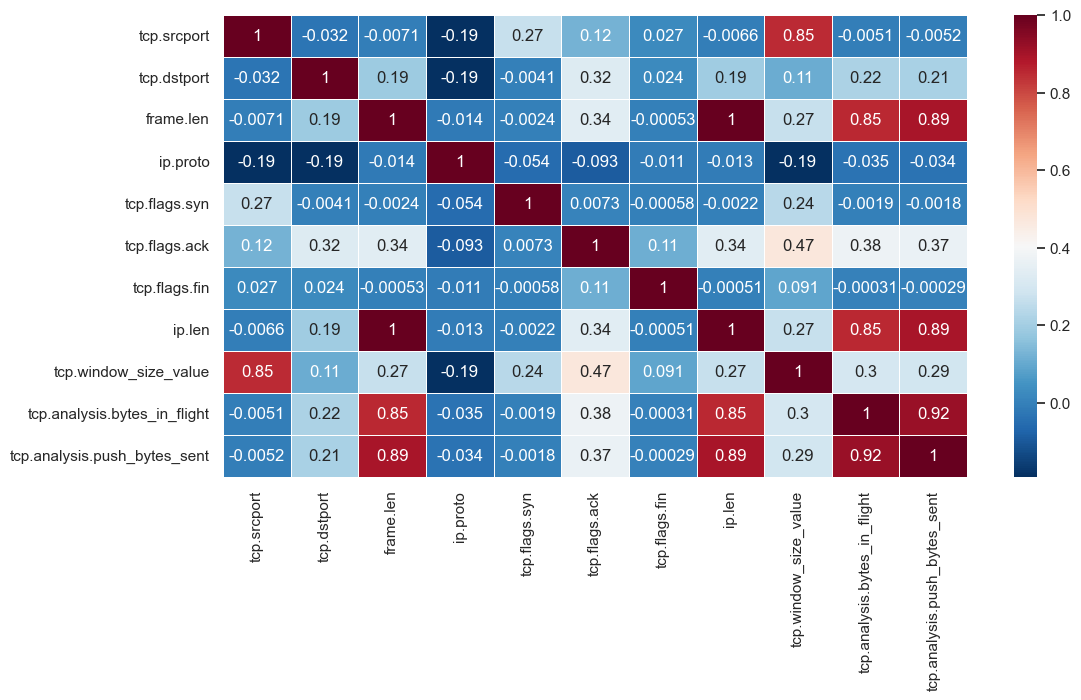

In [15]:
matrix_corr_pearson = df.drop('traficnature', axis=1).corr(method='pearson')
sb.set(rc={'figure.figsize':(12,6)})
sb.heatmap(matrix_corr_pearson, 
            xticklabels=matrix_corr_pearson.columns,
            yticklabels=matrix_corr_pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [16]:
df

,tcp.srcport,tcp.dstport,frame.len,ip.proto,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,ip.len,tcp.window_size_value,tcp.analysis.bytes_in_flight,tcp.analysis.push_bytes_sent,traficnature
0,0,0,87,17,0,0,0,73,0,0,0,normal
1,0,0,87,17,0,0,0,73,0,0,0,normal
2,0,0,151,17,0,0,0,137,0,0,0,normal
3,0,0,168,17,0,0,0,154,0,0,0,normal
4,41982,443,74,6,1,0,0,60,64240,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
3250838,35050,80,141,6,0,1,0,127,64240,87,87,udpflood
3250839,80,35050,60,6,0,1,0,40,64240,0,0,udpflood
3250840,80,35050,243,6,0,1,1,229,64240,189,189,udpflood
3250841,35050,80,54,6,0,1,1,40,64050,0,0,udpflood


In [ ]:
# columnsdrop=['frame.number','frame.len','tcp.options.mss_val']
# df=df.drop(columns=columnsdrop,axis=1)
# df

In [18]:
df = df[df['traficnature'].isin(['synflood','land','icmpflood','httpflood','tcpflood','udpflood'])]
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df=df.reset_index(drop=True)
df

,tcp.srcport,tcp.dstport,frame.len,ip.proto,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,ip.len,tcp.window_size_value,tcp.analysis.bytes_in_flight,tcp.analysis.push_bytes_sent,traficnature
0,0,22,60,6,0,0,0,40,512,0,0,synflood
1,22,0,54,6,0,1,0,40,0,0,0,synflood
2,1,22,60,6,0,0,0,40,512,0,0,synflood
3,22,1,54,6,0,1,0,40,0,0,0,synflood
4,2,22,60,6,0,0,0,40,512,0,0,synflood
...,...,...,...,...,...,...,...,...,...,...,...,...
3160394,35050,80,141,6,0,1,0,127,64240,87,87,udpflood
3160395,80,35050,60,6,0,1,0,40,64240,0,0,udpflood
3160396,80,35050,243,6,0,1,1,229,64240,189,189,udpflood
3160397,35050,80,54,6,0,1,1,40,64050,0,0,udpflood


In [19]:
from sklearn import preprocessing
def label_encoder(colum):
    le = preprocessing.LabelEncoder()
    le.fit(colum)
    print(list(le.classes_))
    return le.transform(colum)

In [20]:
def data_pre(df):
    liste=["traficnature"]
    for i in liste:
      df[i]=label_encoder(df[i])

In [21]:
data_pre(df)

['httpflood', 'icmpflood', 'land', 'synflood', 'tcpflood', 'udpflood']


In [22]:
df.groupby("traficnature").size()

traficnature
0     121048
1     693277
2        885
3       9973
4      93850
5    2241366
dtype: int64

Class=3, n=9973 (0.316%)
Class=2, n=885 (0.028%)
Class=1, n=693277 (21.936%)
Class=0, n=121048 (3.830%)
Class=4, n=93850 (2.970%)
Class=5, n=2241366 (70.920%)


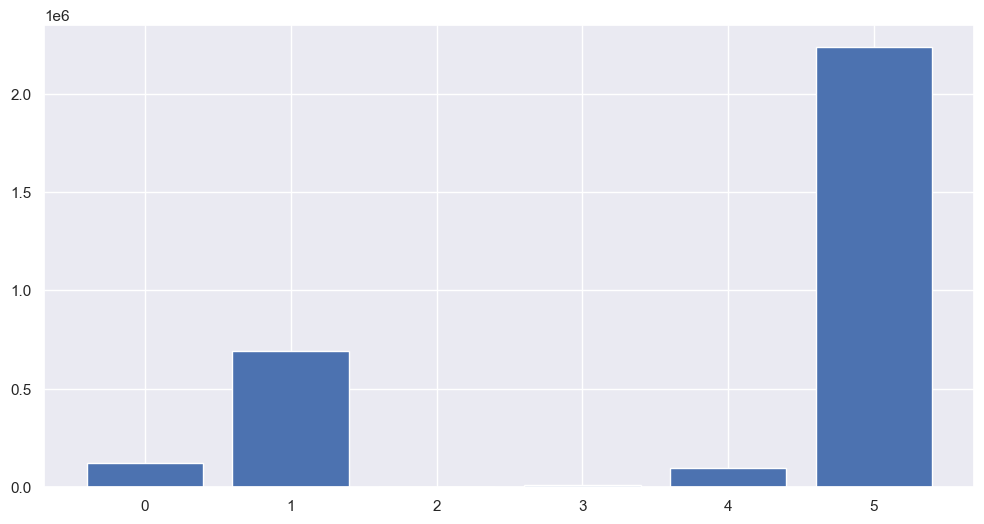

In [23]:
from collections import Counter
from matplotlib import pyplot

# Séparer les caractéristiques (X) et les étiquettes (y)
X = df.drop('traficnature', axis=1)
y = df['traficnature']

# Compter les occurrences de chaque classe dans y
counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

# Tracer un graphique à barres des occurrences de chaque classe
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


In [24]:
df

,tcp.srcport,tcp.dstport,frame.len,ip.proto,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,ip.len,tcp.window_size_value,tcp.analysis.bytes_in_flight,tcp.analysis.push_bytes_sent,traficnature
0,0,22,60,6,0,0,0,40,512,0,0,3
1,22,0,54,6,0,1,0,40,0,0,0,3
2,1,22,60,6,0,0,0,40,512,0,0,3
3,22,1,54,6,0,1,0,40,0,0,0,3
4,2,22,60,6,0,0,0,40,512,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3160394,35050,80,141,6,0,1,0,127,64240,87,87,5
3160395,80,35050,60,6,0,1,0,40,64240,0,0,5
3160396,80,35050,243,6,0,1,1,229,64240,189,189,5
3160397,35050,80,54,6,0,1,1,40,64050,0,0,5


In [25]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE(random_state=42)
# X, y = oversample.fit_resample(X, y)
# counter = Counter(y)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train.shape: ', X_train.shape)
print('x_test.shape: ', y_train.shape)
print('x_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (2149579, 19)
x_test.shape:  (2149579,)
x_test.shape:  (537395, 19)
y_test.shape:  (537395,)


In [24]:
X_train

,tcp.srcport,tcp.dstport,ip.proto,ip.ttl,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,tcp.seq,tcp.ack,ip.flags.df,ip.id,ip.len,tcp.window_size_value,tcp.analysis.ack_rtt,tcp.analysis.initial_rtt,tcp.analysis.bytes_in_flight,tcp.analysis.push_bytes_sent,tcp.options.wscale.shift,frame.time_epoch
999626,53522.0,5173.0,6,128,0,1,0,21,876,0,6136,40,1023,0.005485,0.004548,0.0,0.0,0,1.711867e+09
2275811,5000.0,44391.522825,6,128,0,1,0,281,250,1,620,52,8194,0.000029,0.006898,0.0,0.0,0,1.711925e+09
962706,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,1.711658e+09
190812,5000.0,63960.0,6,128,0,1,0,5571600,422,1,1987,2960,2051,0.0,0.412249,1038060.0,11148560.0,0,1.711595e+09
215358,5000.0,63973.0,6,128,0,1,0,13192800,342,1,34574,1500,2051,0.0,0.106893,1182600.0,32292008.0,0,1.711595e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,63878.0,5000.0,6,128,0,1,0,422,9244960,1,21939,40,1026,0.0,0.0,0.0,0.0,0,1.711594e+09
1692743,63744.0,443.0,6,128,1,0,0,0,0,1,180,52,65535,0.0,0.0,0.0,0.0,8,1.711658e+09
2356330,48309.533976,5000.0,6,64,0,1,0,253,282,1,52215,52,501,0.006142,0.01471,0.0,0.0,0,1.711925e+09
2229084,5000.0,49800.0,6,128,0,1,0,282,254,1,27563,52,8194,0.000048,0.009358,0.0,0.0,0,1.711925e+09


In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X=scaler.transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train

array([[ 1.04143655, -0.46843043,  0.2869853 , ..., -0.18446243,
        -0.33343722,  0.5645358 ],
       [-0.78085524,  1.3206419 ,  0.2869853 , ..., -0.18446243,
        -0.33343722,  1.03256492],
       [-0.96863519, -0.70441258, -1.73411335, ..., -0.18446243,
        -0.33343722, -1.12411655],
       ...,
       [ 0.84567722, -0.47632236,  0.2869853 , ..., -0.18446243,
        -0.33343722,  1.03342257],
       [-0.78085524,  1.56736605,  0.2869853 , ..., -0.18446243,
        -0.33343722,  1.03488546],
       [-0.78085524,  0.90347067,  0.2869853 , ..., -0.18445895,
        -0.33343722,  1.03286228]])

In [27]:
unique, countss = np.unique(y_train, return_counts=True)
dict(zip(unique, countss))

{0: 358368, 1: 357824, 2: 358212, 3: 358364, 4: 358484, 5: 358327}

In [28]:
unique, countss = np.unique(y_test, return_counts=True)
dict(zip(unique, countss))

{0: 89461, 1: 90005, 2: 89617, 3: 89465, 4: 89345, 5: 89502}

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [30]:
def metrics_error(y_true,y_pred):
    # calculate MAE, MSE, RMSE
    print('accuracy : '+str(metrics.accuracy_score(y_true, y_pred)))
    print('mean absolute error : '+str(metrics.mean_absolute_error(y_true, y_pred)))
    print('mean squared error : '+str(metrics.mean_squared_error(y_true, y_pred)))
    print('root mean squared error : '+str(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))

In [31]:
def confixion_metrix(y_test, yy_predict, outcome_labels):
    # Confusion Matrix
    sns.heatmap(
        metrics.confusion_matrix(y_test, yy_predict),
        annot=True,
        fmt="d",
        xticklabels=outcome_labels,
        yticklabels=outcome_labels
    )
    pyplot.show()

In [32]:
from sklearn.metrics import roc_curve, auc
target=['arppoisoning', 'httpflood', 'httploginbruteforce', 'normal', 'pingflood', 'synflood']
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Graph AUC ROC CURVE ')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], target[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# **DecisionTreeClassifier**

**************Decision Tree Classifier*****************
Train Decision Tree Classifier confusion matrix train
accuracy : 1.0
mean absolute error : 0.0
mean squared error : 0.0
root mean squared error : 0.0


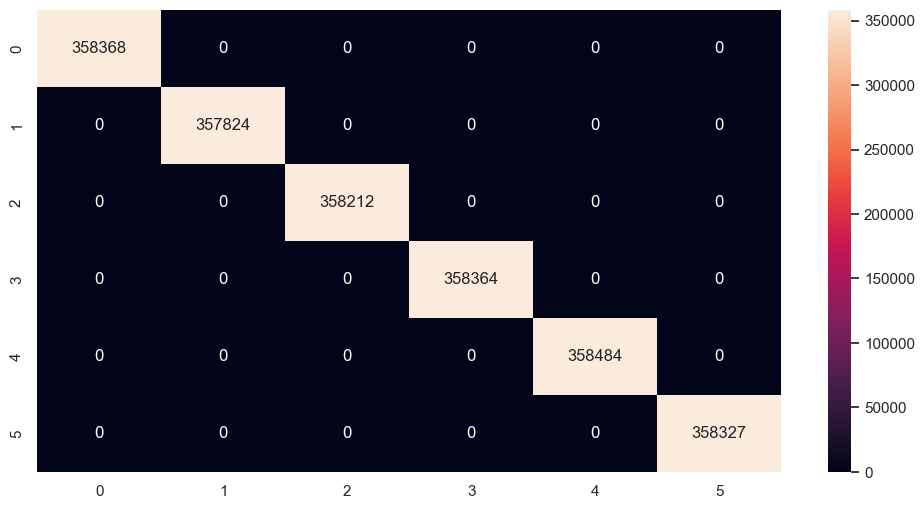

Classification report Training


ValueError: Number of classes, 6, does not match size of target_names, 7. Try specifying the labels parameter

In [34]:
from sklearn.metrics import classification_report
outcome_labels = sorted(unique)
print('**************Decision Tree Classifier*****************')
Decision_Tree_Classifier=DecisionTreeClassifier(random_state=42)
Decision_Tree_Classifier.fit(X_train,y_train)
y_predict_Decision_Tree_Classifier=Decision_Tree_Classifier.predict(X_test)
y_predict_train_Decision_Tree_Classifier=Decision_Tree_Classifier.predict(X_train)
print('Train Decision Tree Classifier confusion matrix train')
metrics_error(y_train,y_predict_train_Decision_Tree_Classifier)
cm = metrics.confusion_matrix(y_train, y_predict_train_Decision_Tree_Classifier)
confixion_metrix(y_train,y_predict_train_Decision_Tree_Classifier, outcome_labels)
print('Classification report Training')
print(classification_report(y_train,y_predict_train_Decision_Tree_Classifier, target_names=target))

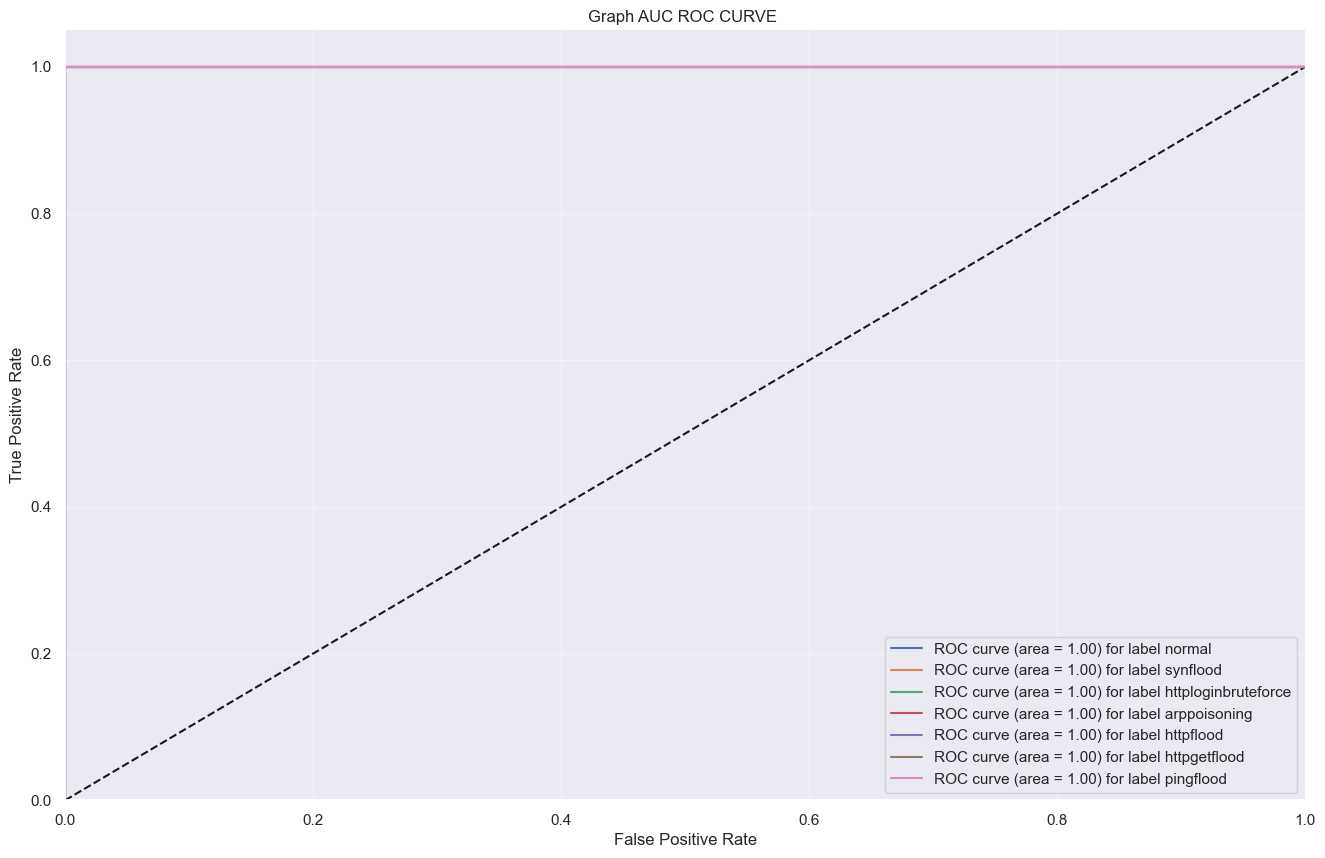

In [ ]:
plot_multiclass_roc(Decision_Tree_Classifier, X_train, y_train, n_classes=6, figsize=(16, 10))

**************Test Decision Tree Classifier*****************
accuracy : 1.0
mean absolute error : 0.0
mean squared error : 0.0
root mean squared error : 0.0


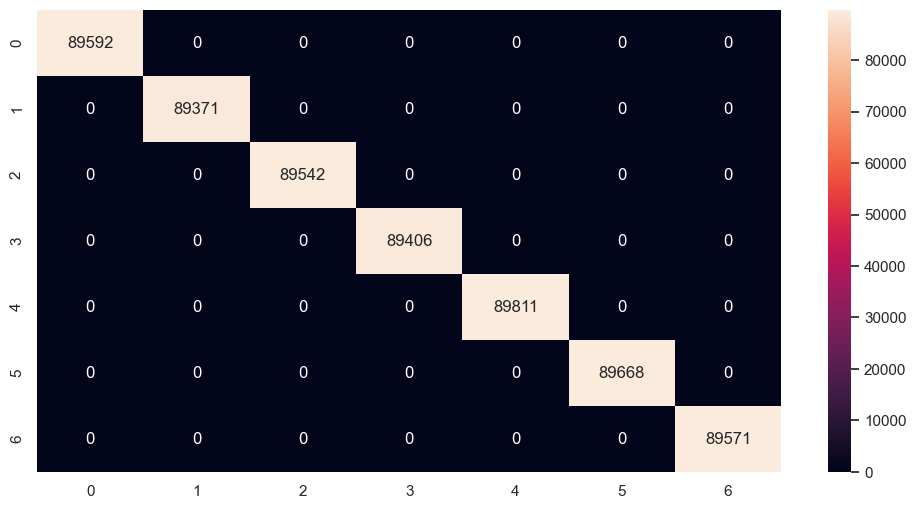

Classification report Test
                     precision    recall  f1-score   support

             normal       1.00      1.00      1.00     89592
           synflood       1.00      1.00      1.00     89371
httploginbruteforce       1.00      1.00      1.00     89542
       arppoisoning       1.00      1.00      1.00     89406
          httpflood       1.00      1.00      1.00     89811
       httpgetflood       1.00      1.00      1.00     89668
          pingflood       1.00      1.00      1.00     89571

           accuracy                           1.00    626961
          macro avg       1.00      1.00      1.00    626961
       weighted avg       1.00      1.00      1.00    626961



In [ ]:
print('**************Test Decision Tree Classifier*****************')
metrics_error(y_test,y_predict_Decision_Tree_Classifier)
confixion_metrix(y_test, y_predict_Decision_Tree_Classifier, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict_Decision_Tree_Classifier, target_names=target))

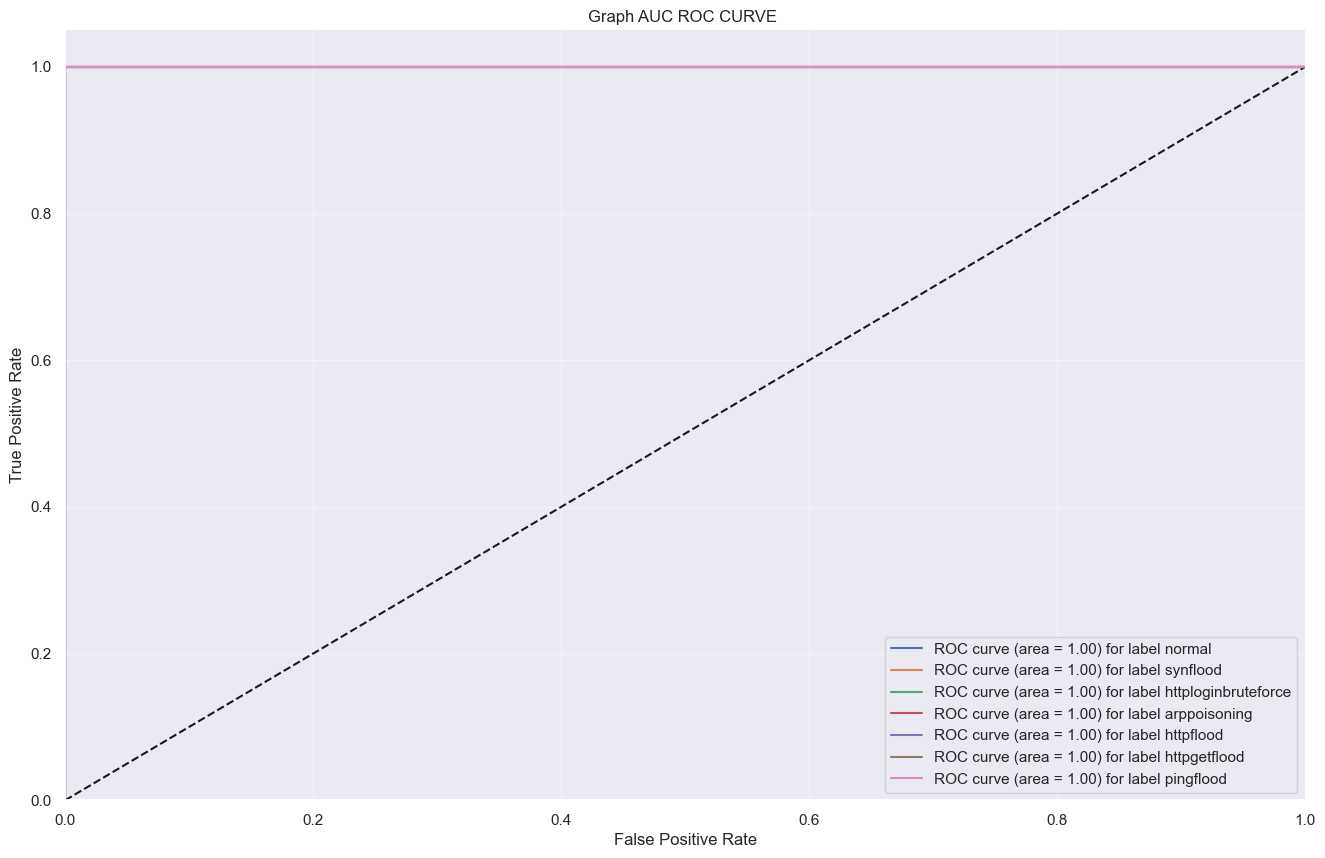

In [ ]:
plot_multiclass_roc(Decision_Tree_Classifier, X_test, y_test, n_classes=6, figsize=(16, 10))

# **Logistic Regression**

**************LogisticRegression*****************
**************Train Logistic Regression*****************
accuracy : 0.9998883502230205
mean absolute error : 0.0004912590187101101
mean squared error : 0.0022856304344532072
root mean squared error : 0.04780826742785402


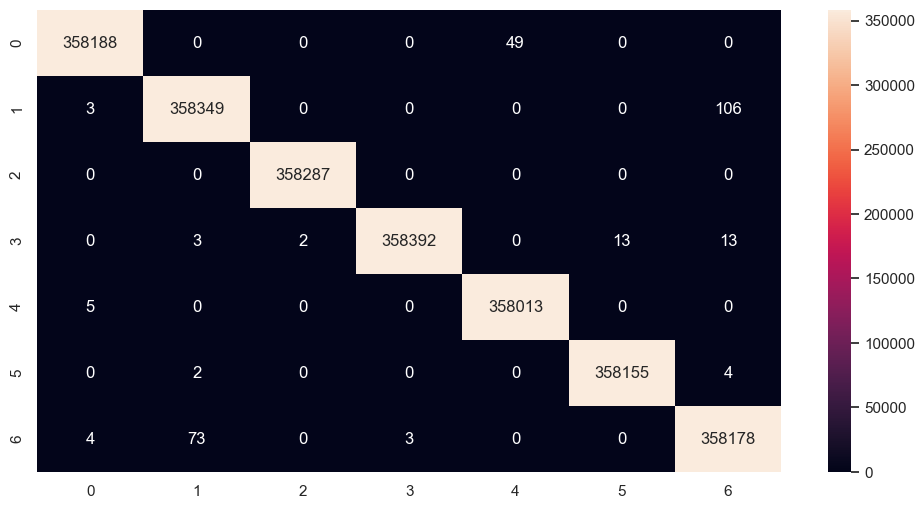

Classification report Training
                     precision    recall  f1-score   support

             normal       1.00      1.00      1.00    358237
           synflood       1.00      1.00      1.00    358458
httploginbruteforce       1.00      1.00      1.00    358287
       arppoisoning       1.00      1.00      1.00    358423
          httpflood       1.00      1.00      1.00    358018
       httpgetflood       1.00      1.00      1.00    358161
          pingflood       1.00      1.00      1.00    358258

           accuracy                           1.00   2507842
          macro avg       1.00      1.00      1.00   2507842
       weighted avg       1.00      1.00      1.00   2507842



In [ ]:
print('**************LogisticRegression*****************')
lgg = LogisticRegression(max_iter=500,random_state=42)
lgg.fit(X_train,y_train)
y_predict=lgg.predict(X_test)
y_predict_train=lgg.predict(X_train)
print('**************Train Logistic Regression*****************')
metrics_error(y_train,y_predict_train)
cm = metrics.confusion_matrix(y_train, y_predict_train)
confixion_metrix(y_train, y_predict_train, outcome_labels)
print('Classification report Training')
print(classification_report(y_train, y_predict_train, target_names=target))

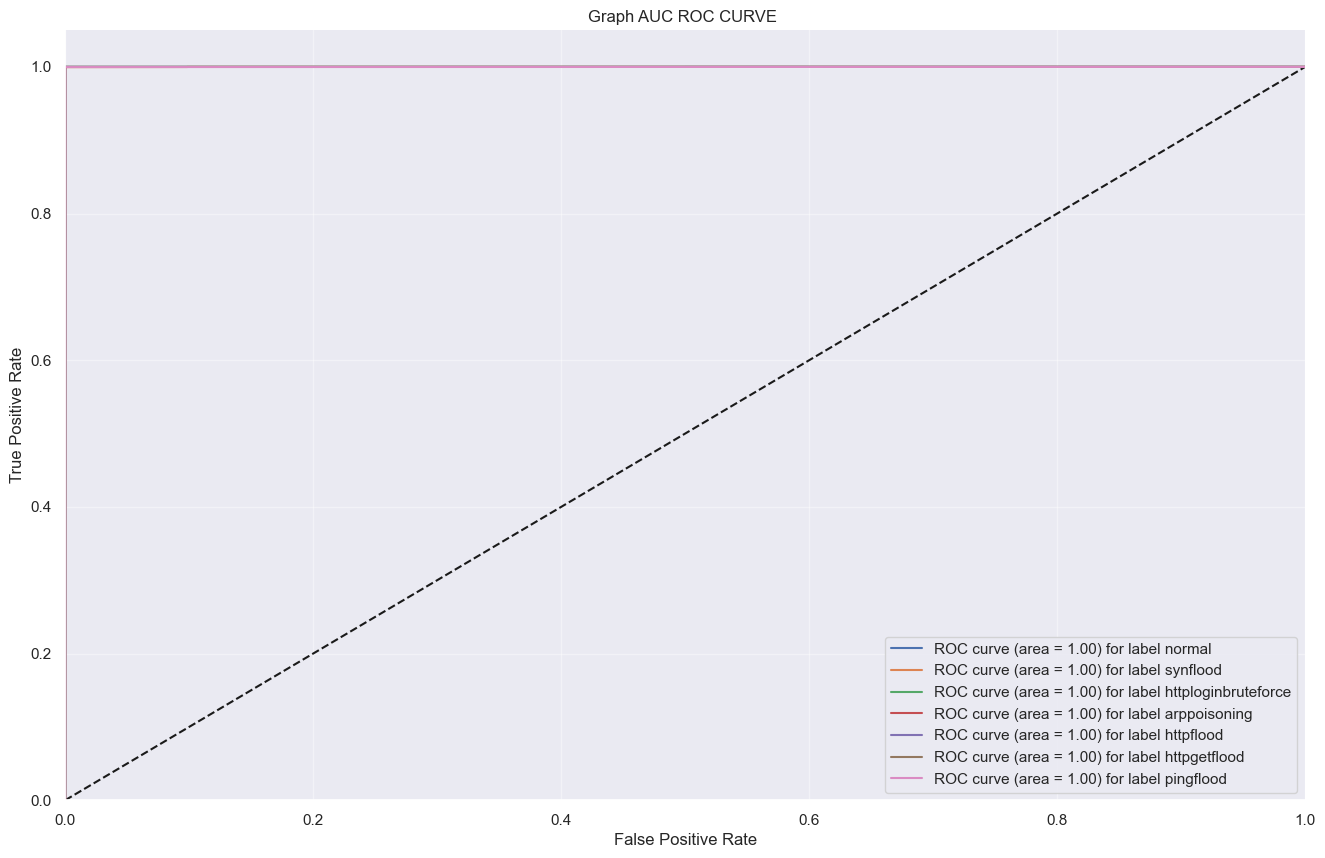

In [ ]:
plot_multiclass_roc(lgg, X_train, y_train, n_classes=6, figsize=(16, 10))

**************Test Logistic Regression*****************
accuracy : 0.9998931352986868
mean absolute error : 0.0004593587160923885
mean squared error : 0.0020958241421715224
root mean squared error : 0.0457801719325247


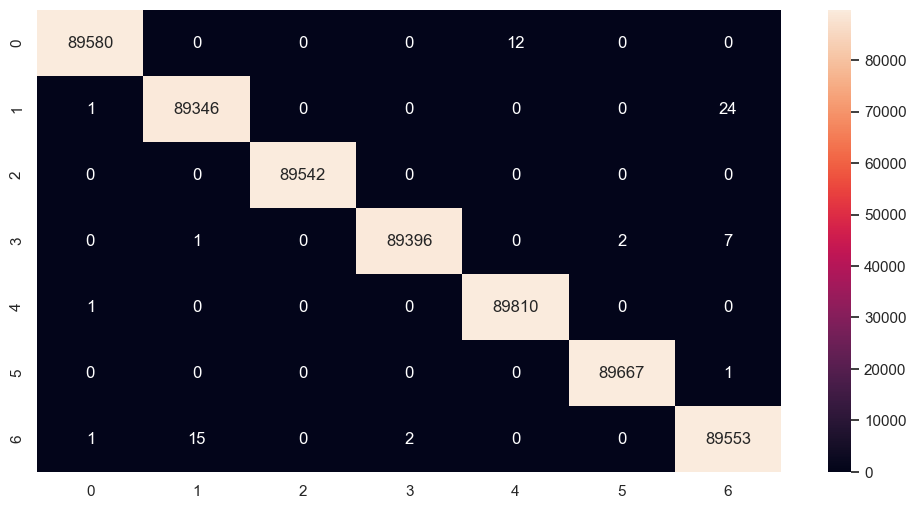

Classification report Test
                     precision    recall  f1-score   support

             normal       1.00      1.00      1.00     89592
           synflood       1.00      1.00      1.00     89371
httploginbruteforce       1.00      1.00      1.00     89542
       arppoisoning       1.00      1.00      1.00     89406
          httpflood       1.00      1.00      1.00     89811
       httpgetflood       1.00      1.00      1.00     89668
          pingflood       1.00      1.00      1.00     89571

           accuracy                           1.00    626961
          macro avg       1.00      1.00      1.00    626961
       weighted avg       1.00      1.00      1.00    626961



In [ ]:
print('**************Test Logistic Regression*****************')
metrics_error(y_test,y_predict)
cm = metrics.confusion_matrix(y_test, y_predict)
confixion_metrix(y_test, y_predict, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict, target_names=target))

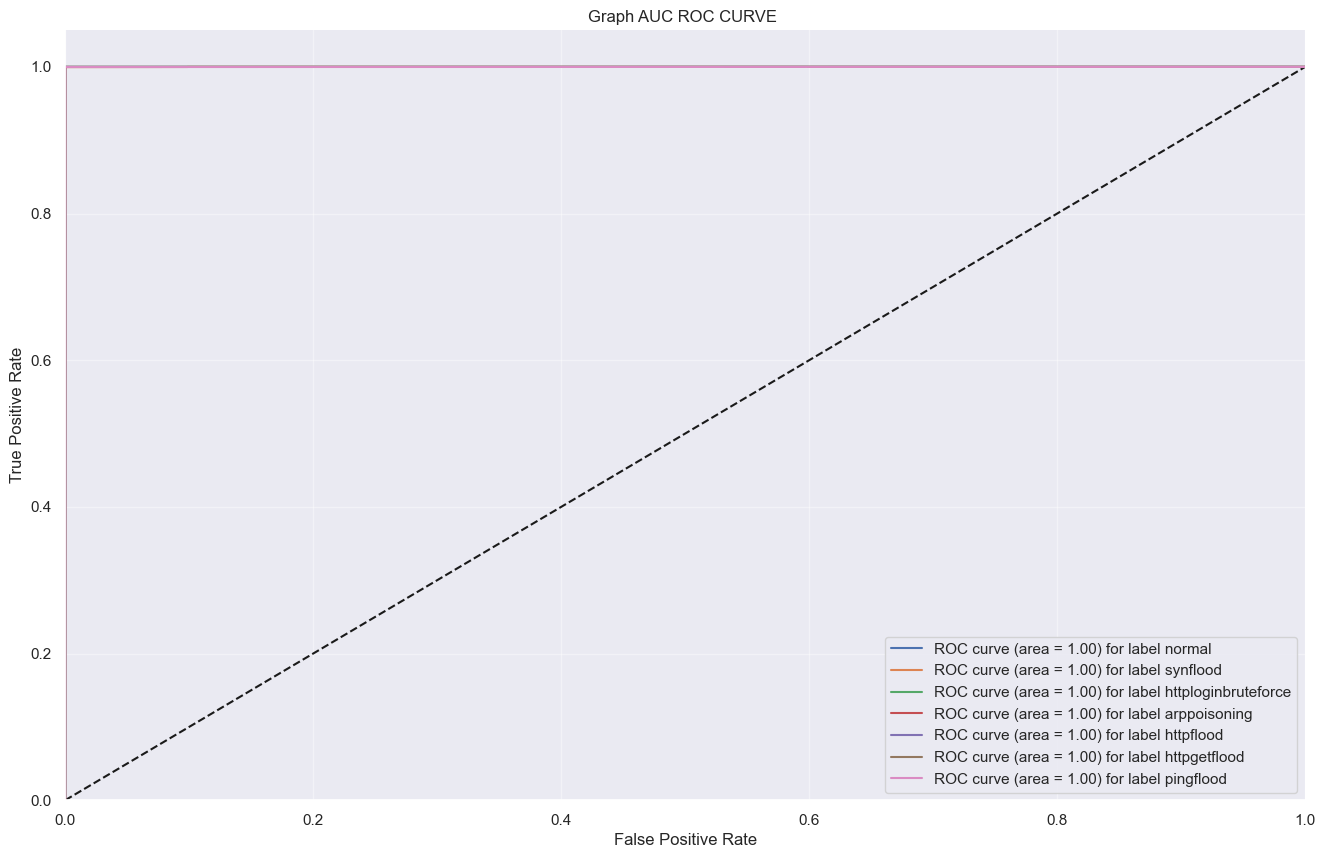

In [ ]:
plot_multiclass_roc(lgg, X_test, y_test, n_classes=6, figsize=(16, 10))

# **Random Forest**


**************Random Forest *****************
**************Train Random Forest *****************
accuracy : 1.0
mean absolute error : 0.0
mean squared error : 0.0
root mean squared error : 0.0


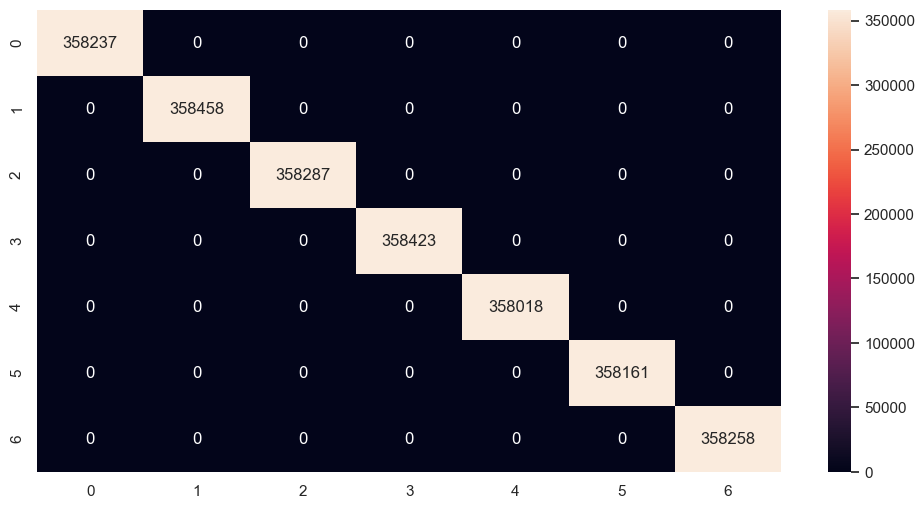

Classification report Training
                     precision    recall  f1-score   support

             normal       1.00      1.00      1.00    358237
           synflood       1.00      1.00      1.00    358458
httploginbruteforce       1.00      1.00      1.00    358287
       arppoisoning       1.00      1.00      1.00    358423
          httpflood       1.00      1.00      1.00    358018
       httpgetflood       1.00      1.00      1.00    358161
          pingflood       1.00      1.00      1.00    358258

           accuracy                           1.00   2507842
          macro avg       1.00      1.00      1.00   2507842
       weighted avg       1.00      1.00      1.00   2507842



In [ ]:
print('**************Random Forest *****************')
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train,y_train)
y_predict_model_RF=model_RF.predict(X_test)
y_predict_train_model_RF=model_RF.predict(X_train)
print('**************Train Random Forest *****************')
metrics_error(y_train,y_predict_train_model_RF)
cm = metrics.confusion_matrix(y_train, y_predict_train_model_RF)
confixion_metrix(y_train, y_predict_train_model_RF, outcome_labels)
print('Classification report Training')
print(classification_report(y_train, y_predict_train_model_RF, target_names=target))

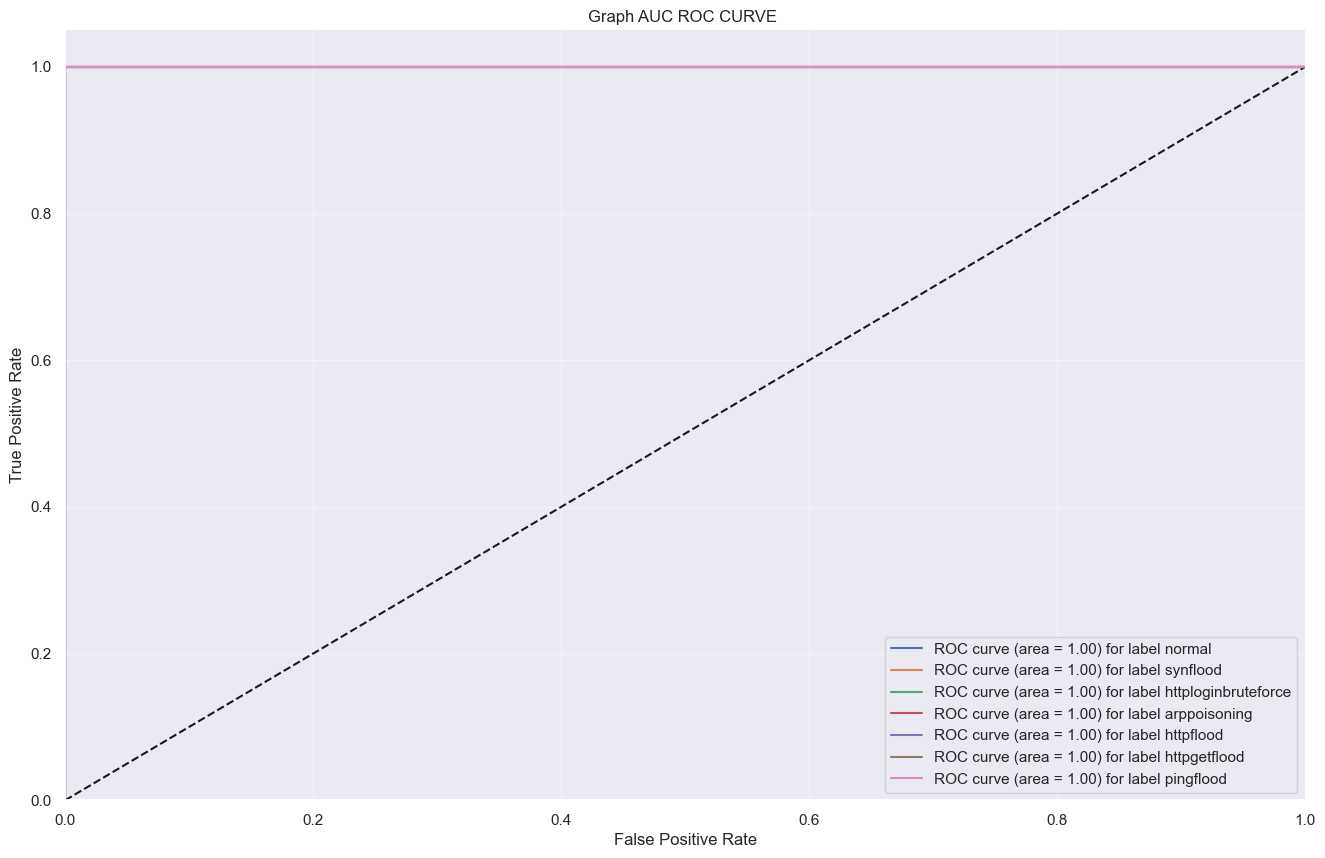

In [ ]:
plot_multiclass_roc(model_RF, X_train, y_train, n_classes=6, figsize=(16, 10))

**************Test Random Forest *****************
accuracy : 1.0
mean absolute error : 0.0
mean squared error : 0.0
root mean squared error : 0.0


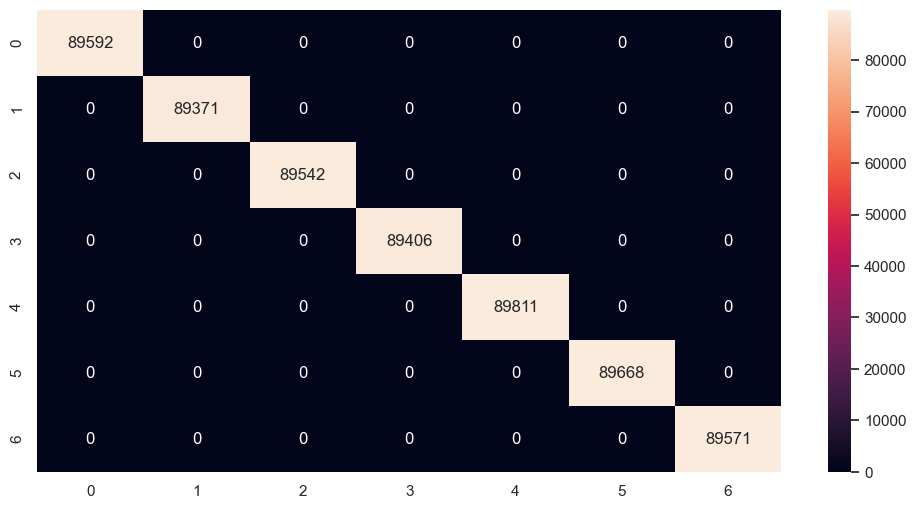

Classification report Test
                     precision    recall  f1-score   support

             normal       1.00      1.00      1.00     89592
           synflood       1.00      1.00      1.00     89371
httploginbruteforce       1.00      1.00      1.00     89542
       arppoisoning       1.00      1.00      1.00     89406
          httpflood       1.00      1.00      1.00     89811
       httpgetflood       1.00      1.00      1.00     89668
          pingflood       1.00      1.00      1.00     89571

           accuracy                           1.00    626961
          macro avg       1.00      1.00      1.00    626961
       weighted avg       1.00      1.00      1.00    626961



In [ ]:
print('**************Test Random Forest *****************')
metrics_error(y_test,y_predict_model_RF)
cm = metrics.confusion_matrix(y_test, y_predict_model_RF)
confixion_metrix(y_test, y_predict_model_RF, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict_model_RF, target_names=target))

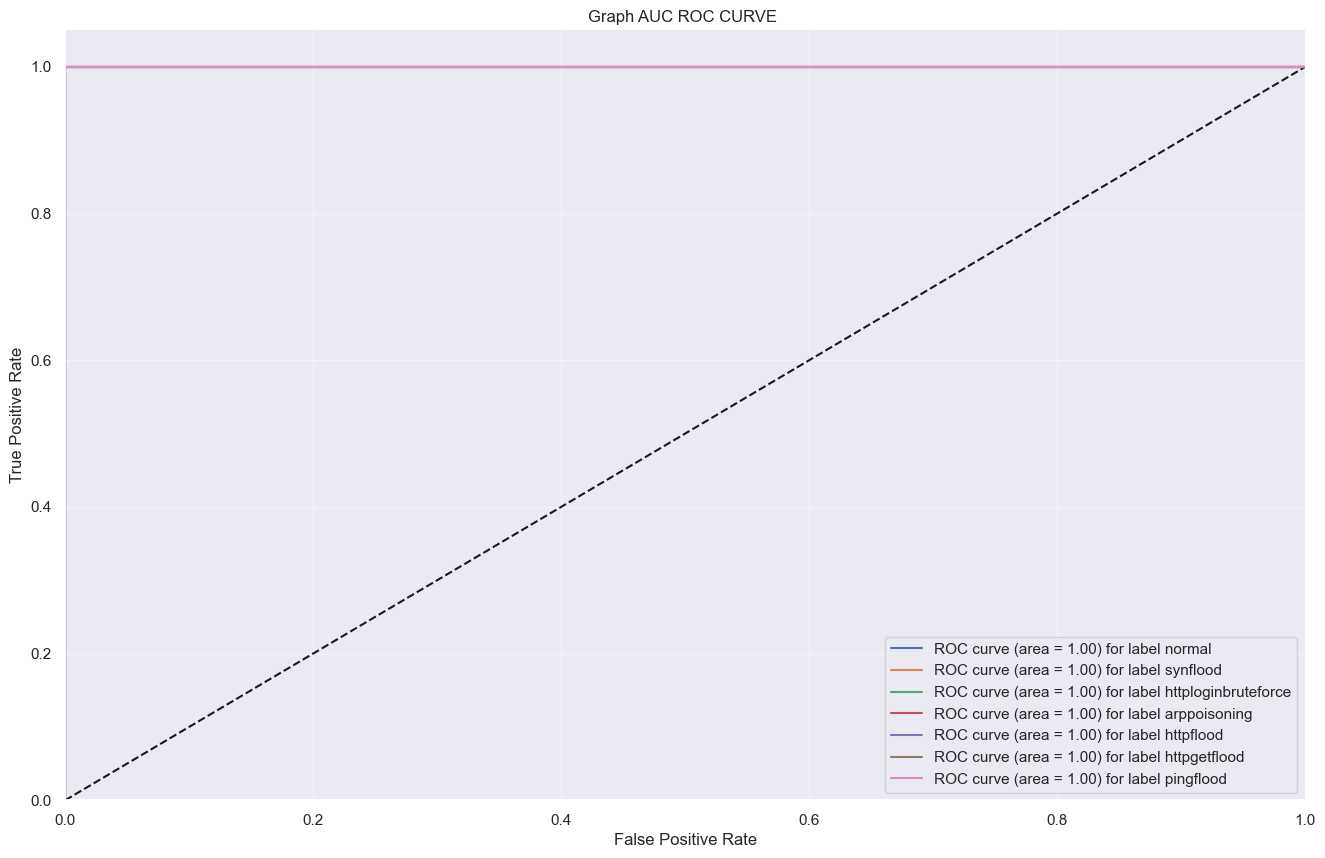

In [ ]:
plot_multiclass_roc(model_RF, X_test, y_test, n_classes=6, figsize=(16, 10))

#  k-nearest neighbors(KNN)

In [ ]:
# print('**************knn neighbors*****************')
# knn_neighbors=KNeighborsClassifier()
# knn_neighbors.fit(X_train,y_train)
# y_predict_knn=knn_neighbors.predict(X_test)
# y_predict_train_knn=knn_neighbors.predict(X_train)
# print('**************Train knn neighbors*****************')
# metrics_error(y_train,y_predict_train_knn)
# cm = metrics.confusion_matrix(y_train, y_predict_train_knn)
# confixion_metrix(y_train, y_predict_train_knn, outcome_labels)
# print('Classification report Training')
# print(classification_report(y_train, y_predict_train_knn, target_names=target))

In [ ]:
# plot_multiclass_roc(knn_neighbors, X_train, y_train, n_classes=6, figsize=(16, 10))

In [ ]:
# print('**************Test knn neighbors*****************')
# metrics_error(y_test,y_predict_knn)
# cm = metrics.confusion_matrix(y_test, y_predict_knn)
# confixion_metrix(y_test, y_predict_knn, outcome_labels)
# print('Classification report Test')
# print(classification_report(y_test, y_predict_knn, target_names=target))

In [ ]:
# plot_multiclass_roc(knn_neighbors, X_test, y_test, n_classes=6, figsize=(16, 10))

# **Naive Baye**


**************naive bayes*****************
**************Train naive bayes*****************
accuracy : 0.9999976075047791
mean absolute error : 9.569980883963184e-06
mean squared error : 3.8279923535852736e-05
root mean squared error : 0.006187077139963


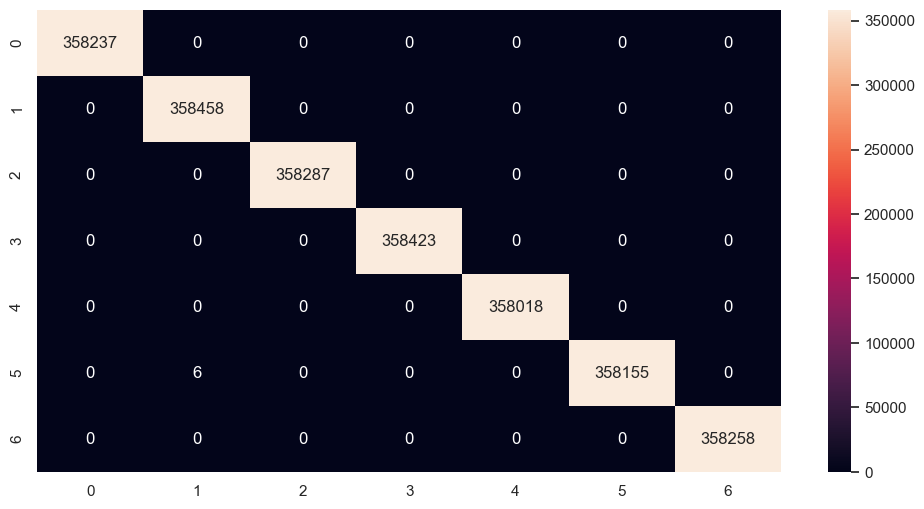

Classification report Training
                     precision    recall  f1-score   support

             normal       1.00      1.00      1.00    358237
           synflood       1.00      1.00      1.00    358458
httploginbruteforce       1.00      1.00      1.00    358287
       arppoisoning       1.00      1.00      1.00    358423
          httpflood       1.00      1.00      1.00    358018
       httpgetflood       1.00      1.00      1.00    358161
          pingflood       1.00      1.00      1.00    358258

           accuracy                           1.00   2507842
          macro avg       1.00      1.00      1.00   2507842
       weighted avg       1.00      1.00      1.00   2507842



In [ ]:
print('**************naive bayes*****************')
#Create a Gaussian Classifier
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)
y_predict_model_nb=model_nb.predict(X_test)
y_predict_train_model_nb=model_nb.predict(X_train)
print('**************Train naive bayes*****************')
metrics_error(y_train,y_predict_train_model_nb)
cm = metrics.confusion_matrix(y_train, y_predict_train_model_nb)
confixion_metrix(y_train, y_predict_train_model_nb, outcome_labels)
print('Classification report Training')
print(classification_report(y_train, y_predict_train_model_nb, target_names=target))

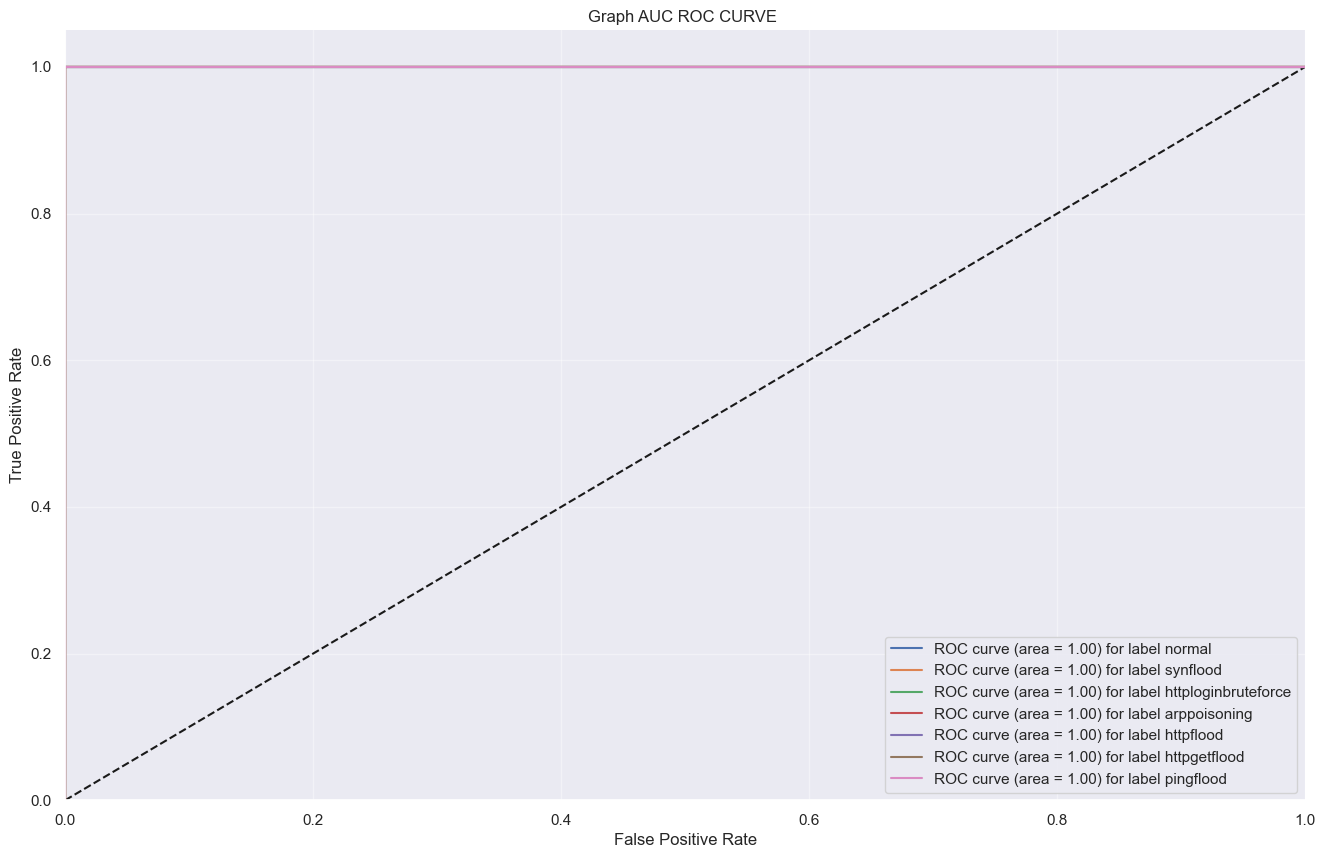

In [ ]:
plot_multiclass_roc(model_nb, X_train, y_train, n_classes=6, figsize=(16, 10))

**************Test naive bayes*****************
accuracy : 0.999998405004458
mean absolute error : 6.379982167949841e-06
mean squared error : 2.5519928671799363e-05
root mean squared error : 0.005051725316344839


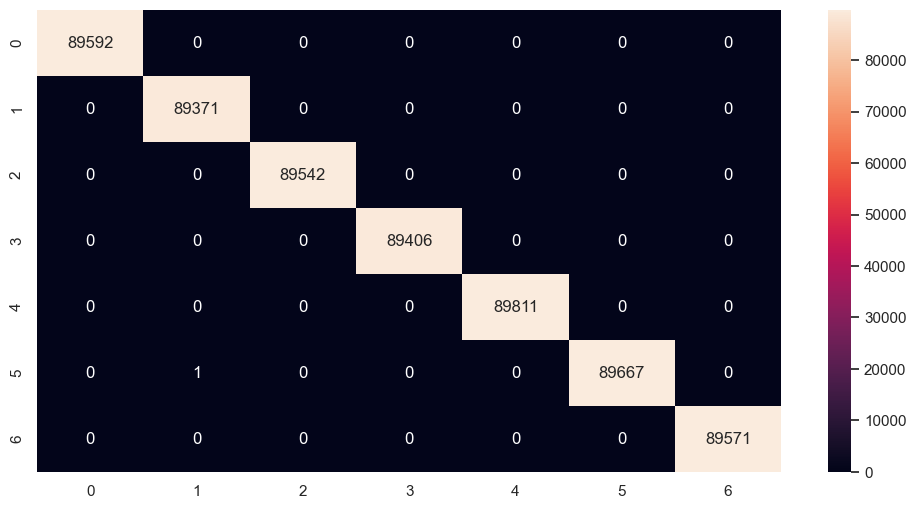

Classification report Test
                     precision    recall  f1-score   support

             normal       1.00      1.00      1.00     89592
           synflood       1.00      1.00      1.00     89371
httploginbruteforce       1.00      1.00      1.00     89542
       arppoisoning       1.00      1.00      1.00     89406
          httpflood       1.00      1.00      1.00     89811
       httpgetflood       1.00      1.00      1.00     89668
          pingflood       1.00      1.00      1.00     89571

           accuracy                           1.00    626961
          macro avg       1.00      1.00      1.00    626961
       weighted avg       1.00      1.00      1.00    626961



In [ ]:
print('**************Test naive bayes*****************')
metrics_error(y_test,y_predict_model_nb)
cm = metrics.confusion_matrix(y_test, y_predict_model_nb)
confixion_metrix(y_test, y_predict_model_nb, outcome_labels)
print('Classification report Test')
print(classification_report(y_test, y_predict_model_nb, target_names=target))

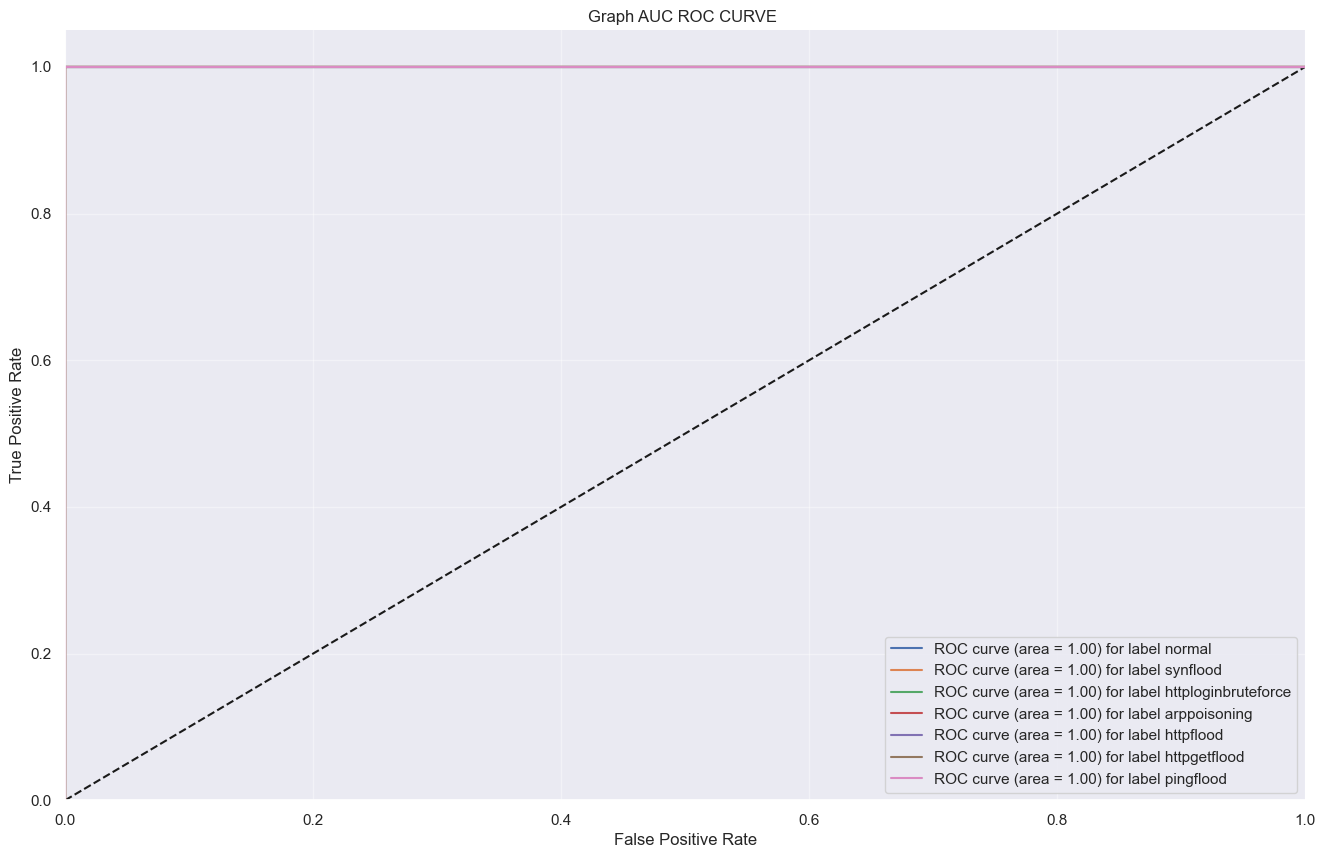

In [ ]:
plot_multiclass_roc(model_nb, X_test, y_test, n_classes=6, figsize=(16, 10))

# MLP perceptron

************* MLP perceptron************
*************test MLP perceptron************
accuracy 0.9999696950847022
RMSE dl 0.027262940460745542


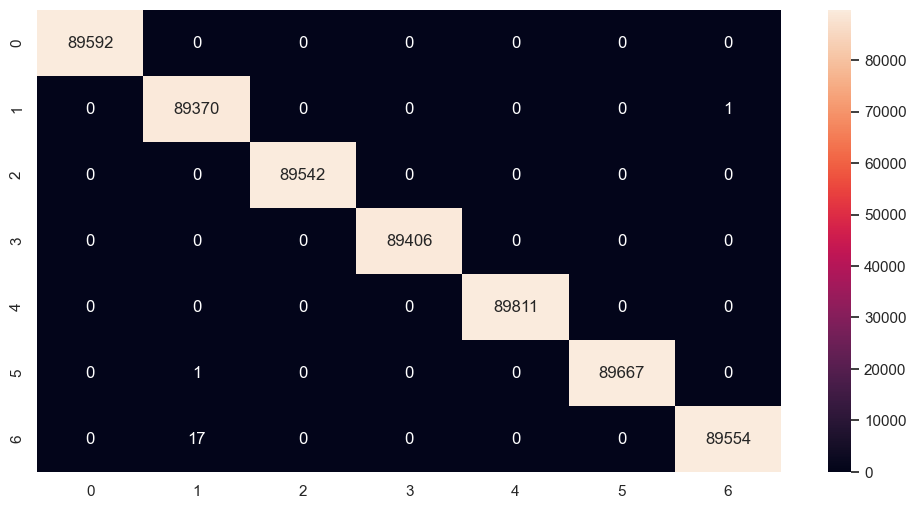

Classification report Test
                     precision    recall  f1-score   support

             normal       1.00      1.00      1.00     89592
           synflood       1.00      1.00      1.00     89371
httploginbruteforce       1.00      1.00      1.00     89542
       arppoisoning       1.00      1.00      1.00     89406
          httpflood       1.00      1.00      1.00     89811
       httpgetflood       1.00      1.00      1.00     89668
          pingflood       1.00      1.00      1.00     89571

           accuracy                           1.00    626961
          macro avg       1.00      1.00      1.00    626961
       weighted avg       1.00      1.00      1.00    626961



In [ ]:
print("************* MLP perceptron************")
mlp=MLPClassifier(max_iter=200,learning_rate_init=0.001,random_state=42,warm_start=True)
mlp.fit(X_train,y_train)
y_predict_mlp=mlp.predict(X_test)
y_predict_mlp_train=mlp.predict(X_train)
print("*************test MLP perceptron************")
print('accuracy',metrics.accuracy_score(y_test,y_predict_mlp))
print('RMSE dl',np.sqrt(metrics.mean_squared_error(y_test,y_predict_mlp)))
confixion_metrix(y_test,y_predict_mlp, outcome_labels)
print('Classification report Test')
print(classification_report(y_test,y_predict_mlp, target_names=target))

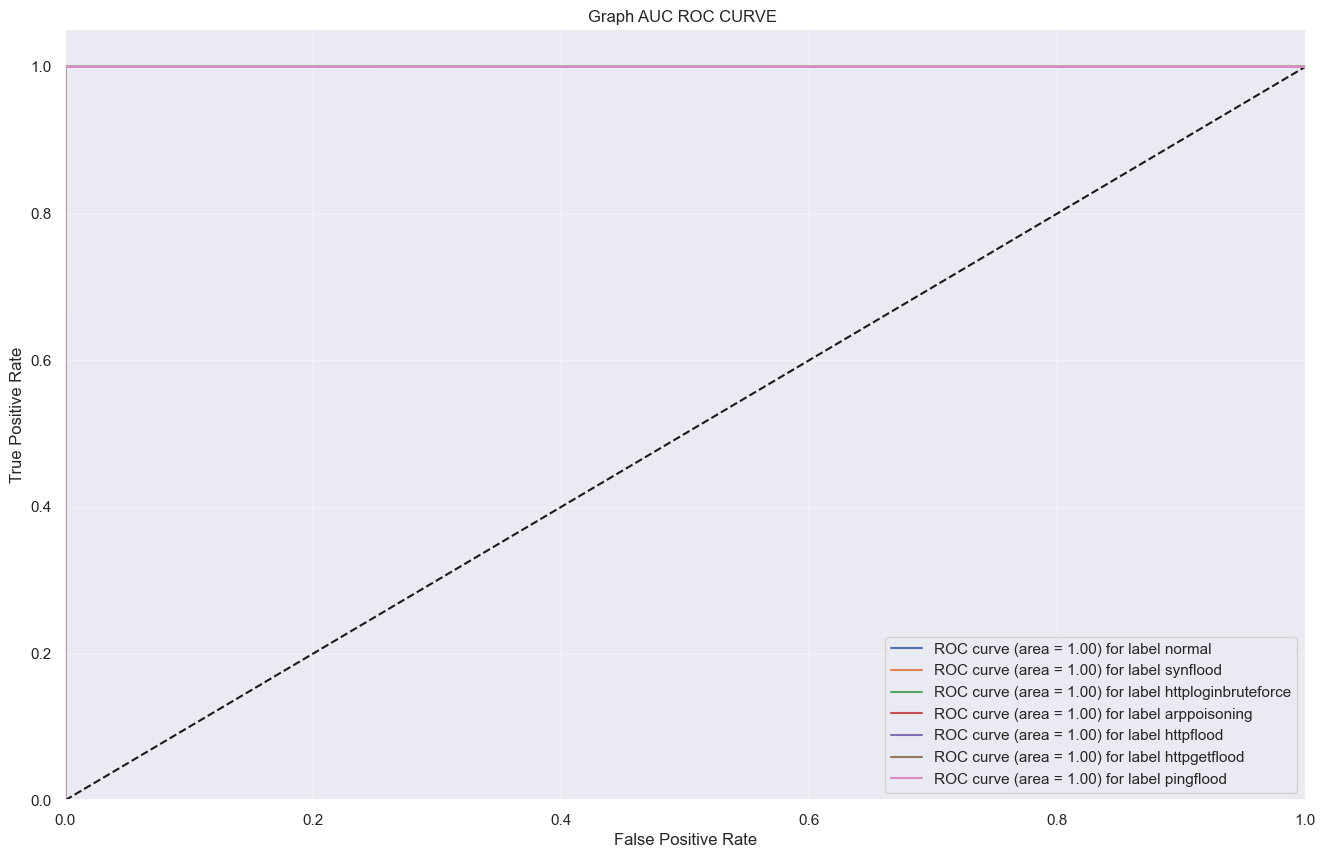

In [ ]:
plot_multiclass_roc(mlp, X_test, y_test, n_classes=6, figsize=(16, 10))

*************train MLP perceptron************
accuracy 0.9999657075684991
RMSE dl 0.02890983103604697


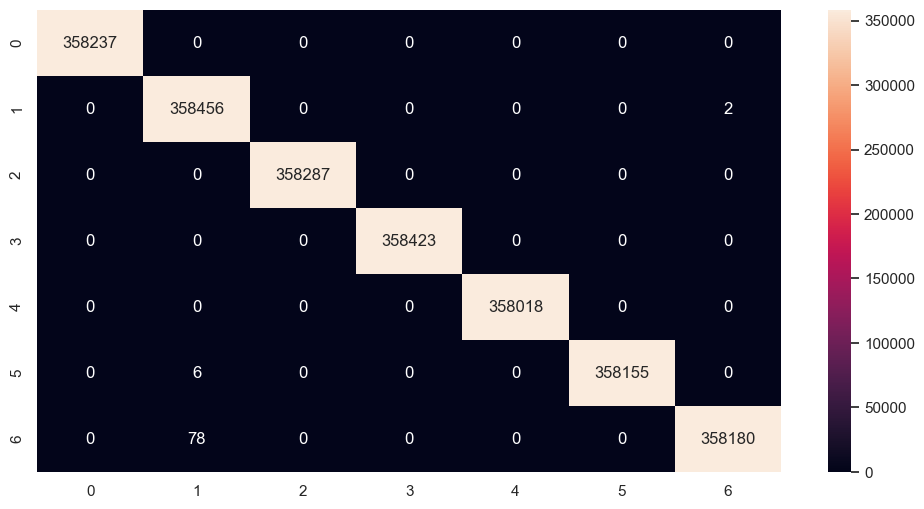

Classification report Training
                     precision    recall  f1-score   support

             normal       1.00      1.00      1.00    358237
           synflood       1.00      1.00      1.00    358458
httploginbruteforce       1.00      1.00      1.00    358287
       arppoisoning       1.00      1.00      1.00    358423
          httpflood       1.00      1.00      1.00    358018
       httpgetflood       1.00      1.00      1.00    358161
          pingflood       1.00      1.00      1.00    358258

           accuracy                           1.00   2507842
          macro avg       1.00      1.00      1.00   2507842
       weighted avg       1.00      1.00      1.00   2507842



In [ ]:
print("*************train MLP perceptron************")
print('accuracy',metrics.accuracy_score(y_train,y_predict_mlp_train))
print('RMSE dl',np.sqrt(metrics.mean_squared_error(y_train,y_predict_mlp_train)))
cm_mlp_train = metrics.confusion_matrix(y_train,y_predict_mlp_train)
confixion_metrix(y_train,y_predict_mlp_train, outcome_labels)
print('Classification report Training')
print(classification_report(y_train,y_predict_mlp_train, target_names=target))

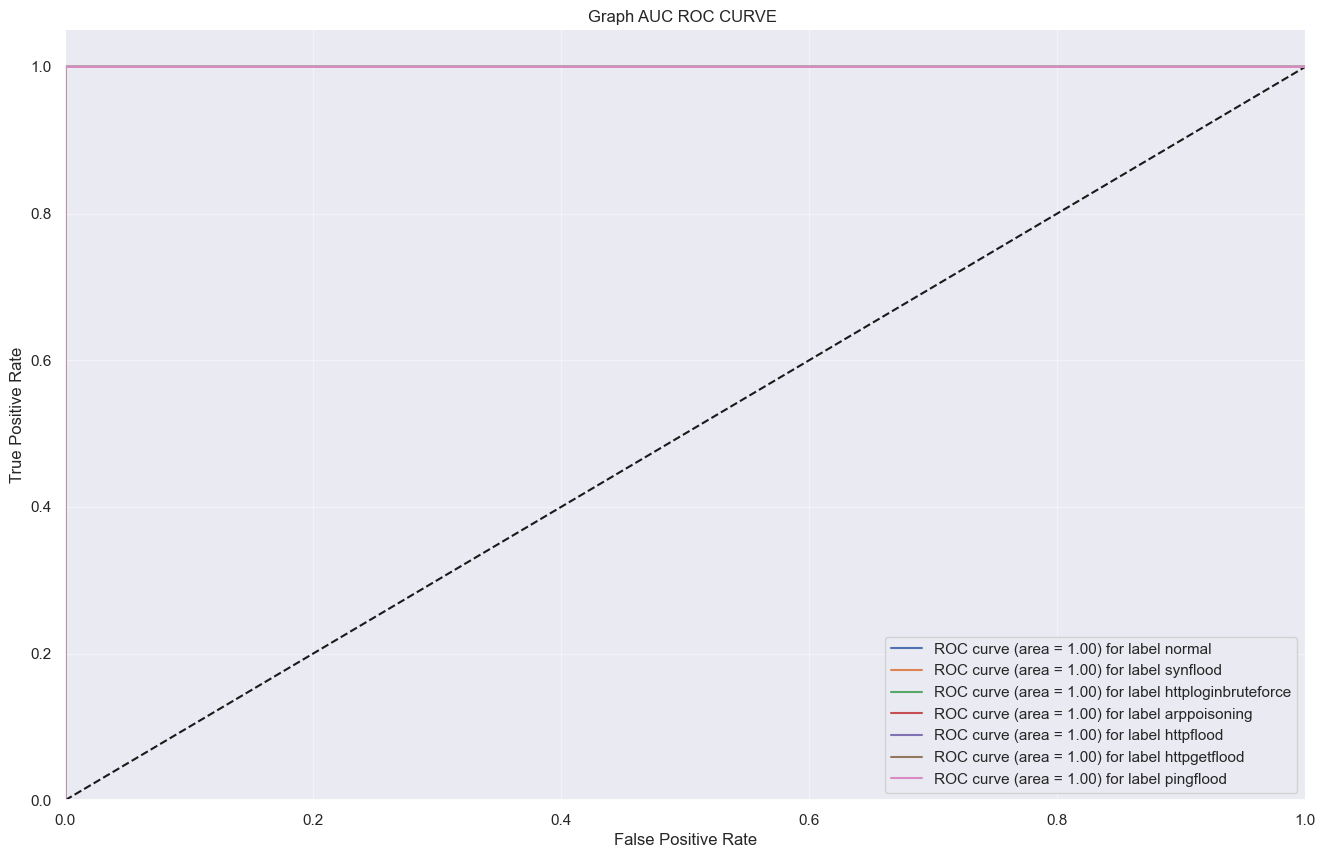

In [ ]:
plot_multiclass_roc(mlp, X_train, y_train, n_classes=6, figsize=(16, 10))

# XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_t = model.predict(X_train)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))
accuracy_train = metrics.accuracy_score(y_train, y_pred_t)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))

Accuracy test: 100.00%
Accuracy train: 100.00%


# **compare all models**


In [ ]:
AS1=metrics.accuracy_score(y_test,y_predict)
RMSE1=np.sqrt(metrics.mean_squared_error(y_test,y_predict))
ASt1=metrics.accuracy_score(y_train,y_predict_train)
RMSEt1=np.sqrt(metrics.mean_squared_error(y_train,y_predict_train))
AS2=metrics.accuracy_score(y_test,y_predict_Decision_Tree_Classifier)
RMSE2=np.sqrt(metrics.mean_squared_error(y_test,y_predict_Decision_Tree_Classifier))
ASt2=metrics.accuracy_score(y_test,y_predict_Decision_Tree_Classifier)
RMSEt2=np.sqrt(metrics.mean_squared_error(y_test,y_predict_Decision_Tree_Classifier))
# AS3=metrics.accuracy_score(y_test,y_predict_knn)
# RMSE3=np.sqrt(metrics.mean_squared_error(y_test,y_predict_knn))

# ASt3=metrics.accuracy_score(y_train,y_predict_train_knn)
# RMSEt3=np.sqrt(metrics.mean_squared_error(y_train,y_predict_train_knn))
AS4=metrics.accuracy_score(y_test,y_predict_model_nb)
RMSE4=np.sqrt(metrics.mean_squared_error(y_test,y_predict_model_nb))

ASt4=metrics.accuracy_score(y_train,y_predict_train_model_nb)
RMSEt4=np.sqrt(metrics.mean_squared_error(y_train,y_predict_train_model_nb))
AS5=metrics.accuracy_score(y_test,y_predict_model_RF)
RMSE5=np.sqrt(metrics.mean_squared_error(y_test,y_predict_model_RF))

ASt5=metrics.accuracy_score(y_train,y_predict_train_model_RF)
RMSEt5=np.sqrt(metrics.mean_squared_error(y_train,y_predict_train_model_RF))

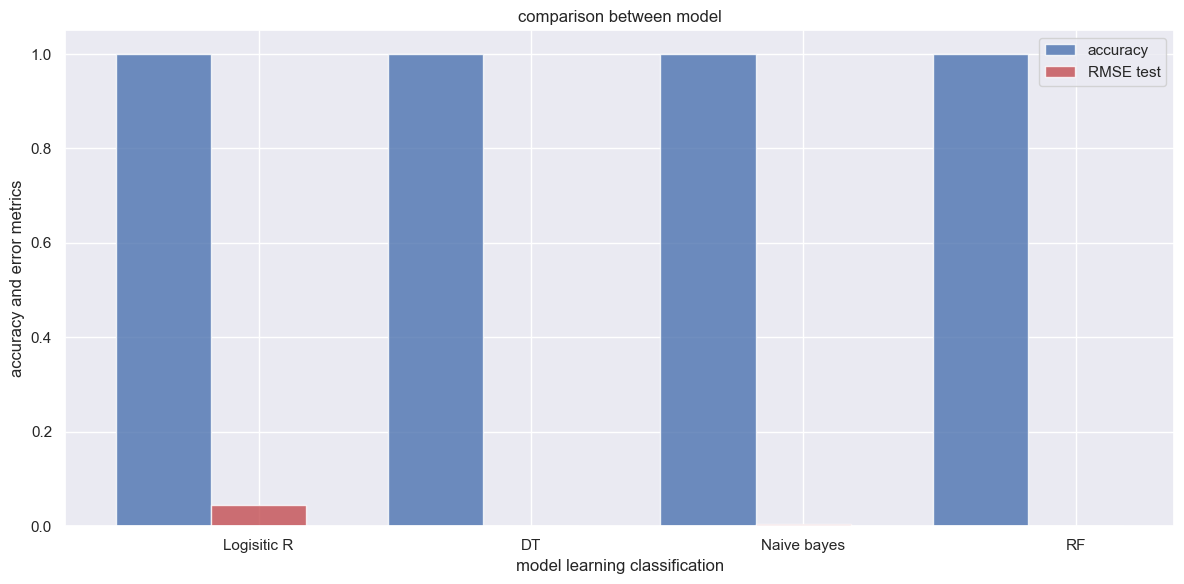

In [ ]:
#visualisation perfermance
# data to plot
n_groups = 4
accuracy_score_models_test = (AS1,AS2,AS4,AS5)
error_metric_models_test = (RMSE1,RMSE2,RMSE4,RMSE5)
# accuracy_score_models_train = (ASt1,ASt2,ASt3,ASt4,ASt5)
# error_metric_models_train = (RMSEt1,RMSEt2,RMSEt3,RMSEt4,RMSEt5)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(index, accuracy_score_models_test, bar_width,
alpha=opacity,
color='b',
label='accuracy')

rects2 = plt.bar(index + bar_width, error_metric_models_test, bar_width,
alpha=opacity,
color='r',
label='RMSE test')

plt.xlabel('model learning classification')
plt.ylabel('accuracy and error metrics')
plt.title('comparison between model')
plt.xticks(index + bar_width, ('Logisitic R', 'DT', 'Naive bayes','RF'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pickle
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(model_RF, f)

In [ ]:
with open('standardscalerclass.pkl','wb') as f:
    pickle.dump(scaler,f)